In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch import optim
import Data
from Data import CSVData
from train_model import train_model
from DNN import DNN

In [2]:
features = ['mode',
'Msim',
'Gsim',
'pz_in1', 
'pz_in2',
'px_out1',
'py_out1',
'pz_out1',
'e_out1',
'px_out2',
'py_out2',
'pz_out2',
'e_out2',
'px_out3',
'py_out3',
'pz_out3',
'e_out3',
'px_out4',
'py_out4',
'pz_out4',
'e_out4',
'Mtarget',
'Gtarget',]
label = 'f_rwt'
features_to_rescale = ['Msim',
'Gsim',
'pz_in1', 
'pz_in2',
'px_out1',
'py_out1',
'pz_out1',
'e_out1',
'px_out2',
'py_out2',
'pz_out2',
'e_out2',
'px_out3',
'py_out3',
'pz_out3',
'e_out3',
'px_out4',
'py_out4',
'pz_out4',
'e_out4',
'Mtarget',
'Gtarget']
VLQData = CSVData(batch_size=2048, features_name=features, labels_name=label, features_to_rescale= features_to_rescale, file_names=['/raid/projects/asinha15/train_'+str(i)+'.csv' for i in range(0,10)])
test_data = CSVData(batch_size=1024, features_name=features, labels_name=label, features_to_rescale= features_to_rescale, file_names=['/raid/projects/asinha15/test_'+str(i)+'.csv' for i in range(0,3)])

In [3]:
net = DNN(Layers=[23,32, 64, 16, 8]).build_model()
optimizer = optim.Adam(net.parameters(), lr=1e-3)
epochs=150

In [4]:
losses, test_losses = train_model.train(train_data=VLQData, test_data = test_data, net = net, optimizer=optimizer, epochs=epochs)

[1,  2000] loss: 624150.804
[1,  4000] loss: 3941.998
Epoch 1: 285956.12815363414
[2,  2000] loss: 5104.405
[2,  4000] loss: 244.488
Epoch 2: 2441.6577146790573
[3,  2000] loss: 537.799
[3,  4000] loss: 25.229
Epoch 3: 256.7138252580334
[4,  2000] loss: 361.668
[4,  4000] loss: 3744.340
Epoch 4: 1876.375400882406
[5,  2000] loss: 1315.673
[5,  4000] loss: 73.277
Epoch 5: 635.7711742638891
[6,  2000] loss: 139.689
[6,  4000] loss: 37.118
Epoch 6: 80.7786128978242
[7,  2000] loss: 52.968
[7,  4000] loss: 73.186
Epoch 7: 57.79029974055171
[8,  2000] loss: 233.129
[8,  4000] loss: 2.875
Epoch 8: 107.57013306450345
[9,  2000] loss: 6.046
[9,  4000] loss: 1.215
Epoch 9: 3.402456151568244
[10,  2000] loss: 2.126
[10,  4000] loss: 1.034
Epoch 10: 1.5286461782960064
[11,  2000] loss: 2.500
[11,  4000] loss: 1.071
Epoch 11: 1.7160218137472827
[12,  2000] loss: 1.831
[12,  4000] loss: 1.020
Epoch 12: 1.3875408139373153
[13,  2000] loss: 1.060
[13,  4000] loss: 1.026
Epoch 13: 1.0394937832842754
[

Epoch 107: 1.0052785286183894
[108,  2000] loss: 1.166
[108,  4000] loss: 1.033
Epoch 108: 1.0906009764550868
[109,  2000] loss: 1884.934
[109,  4000] loss: 38.571
Epoch 109: 875.7238348707401
[110,  2000] loss: 110.759
[110,  4000] loss: 10.272
Epoch 110: 55.25506487534868
[111,  2000] loss: 23.549
[111,  4000] loss: 3.274
Epoch 111: 12.320733474597207
[112,  2000] loss: 6.772
[112,  4000] loss: 1.201
Epoch 112: 3.7211278846142344
[113,  2000] loss: 1.405
[113,  4000] loss: 1.006
Epoch 113: 1.1870498502178521
[114,  2000] loss: 12.906
[114,  4000] loss: 2.297
Epoch 114: 7.027570222826182
[115,  2000] loss: 2.420
[115,  4000] loss: 1.049
Epoch 115: 1.669743724910031
[116,  2000] loss: 1.368
[116,  4000] loss: 1.003
Epoch 116: 1.1690284344327413
[117,  2000] loss: 4.553
[117,  4000] loss: 1.024
Epoch 117: 2.6285332406874837
[118,  2000] loss: 1.223
[118,  4000] loss: 1.007
Epoch 118: 1.1046749804852276
[119,  2000] loss: 1.068
[119,  4000] loss: 1.017
Epoch 119: 1.0386684137580067
[120,

In [5]:
model_scripted = torch.jit.script(net)
model_scripted.save('trained_models/model_scripted3.pt')

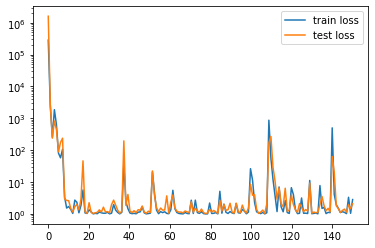

In [7]:
plt.plot(np.linspace(0,epochs, epochs), losses, label = 'train loss')
plt.yscale('log')
plt.plot(np.linspace(0, epochs, epochs), test_losses, label = 'test loss')
plt.yscale('log')
plt.legend()
plt.savefig('plot3.png')
plt.show()